In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
labels_csv = pd.read_csv("../input/dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


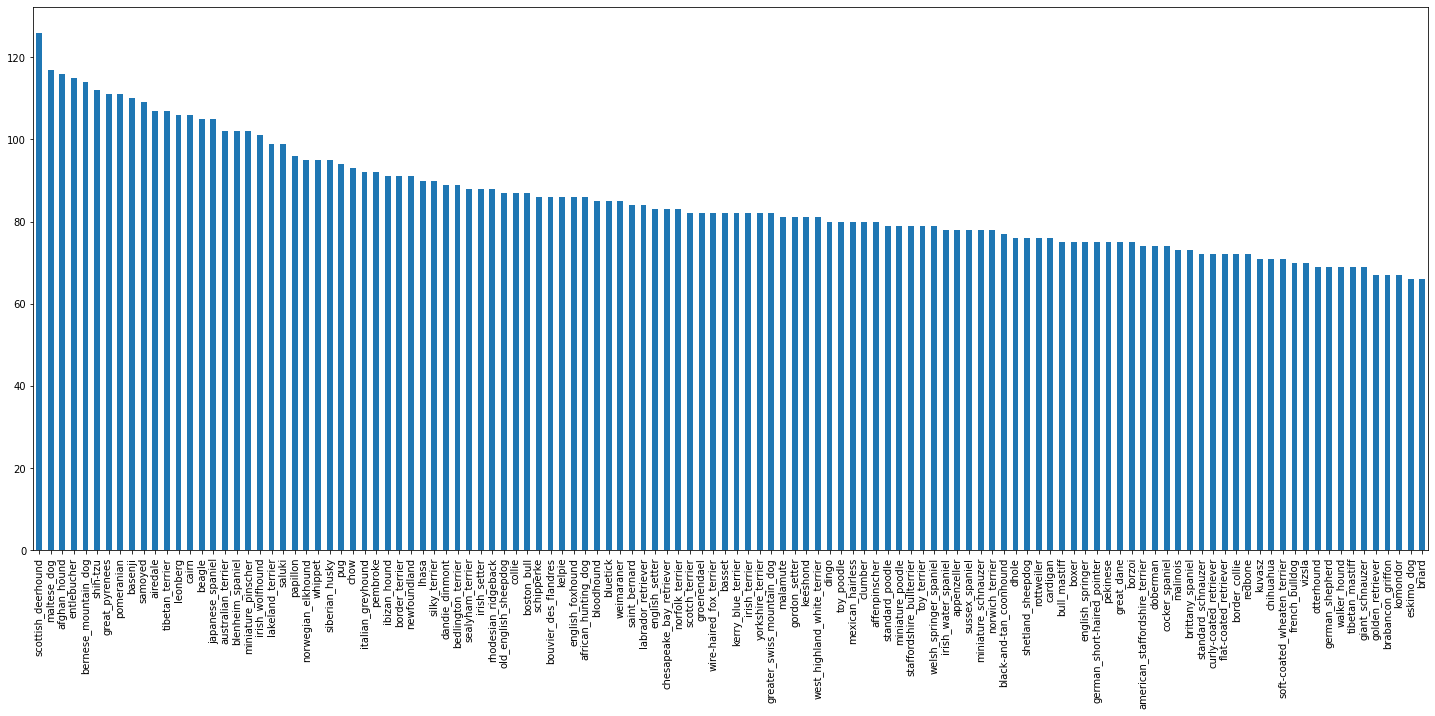

In [3]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize = (25,10));

## Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

* A list a filepaths to training images
* An array of all labels
* An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.

In [4]:
from IPython.display import display,Image
#Image("../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg")

In [5]:
# Create pathnames from image ID's
filenames = ["../input/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['../input/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '../input/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '../input/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '../input/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '../input/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '../input/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '../input/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '../input/dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '../input/dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 '../input/dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [6]:
import os
os.listdir("../input/dog-breed-identification/train/")[:5]

['7d9c53fa846ea7e34bc3efa6830ab668.jpg',
 '04e3bb77c15c18fc1ac101d86d612f46.jpg',
 '2de892b241aeab50aad28c319eaebdbd.jpg',
 'bca88d42e4fc84b3169b13a615f5fdbf.jpg',
 '6496959bd5a27de3cb15e771ca2ae7b3.jpg']

In [7]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("../input/dog-breed-identification/train/")) == len(filenames):
    print("Filenames match actual amount of files!")
else:
    print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!


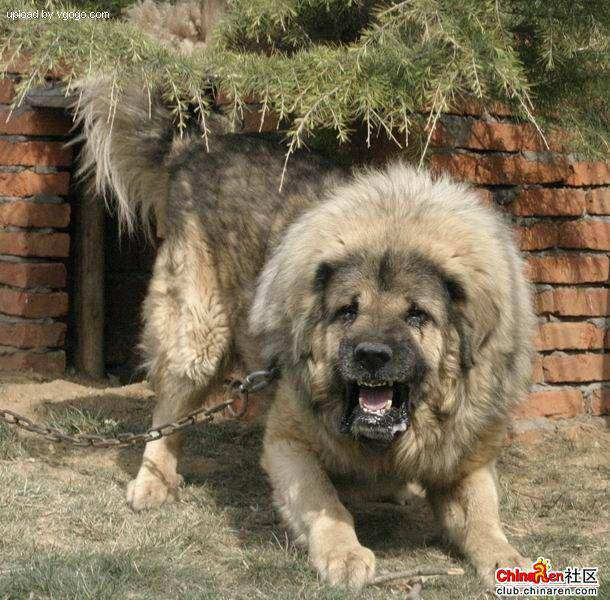

In [8]:
# Check an image directly from a filepath
Image(filenames[9000])

In [9]:
# Now we've got our image filepaths together, let's get the labels.
# Take them from labels_csv and turn them into a NumPy array.

labels = np.array(labels_csv["breed"])
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

we should have the same amount of images and labels.
Finally, since a machine learning model can't take strings as input (what labels currently is), we'll have to convert our labels to numbers.
To begin with, we'll find all of the unique dog breed names.
Then we'll go through the list of labels and compare them to unique breeds and create a list of booleans indicating which one is the real label (True) and which ones aren't (False).

In [10]:
# Find the unique label values
unique_breeds = np.unique(labels_csv["breed"])
len(unique_breeds)

120

In [11]:
# Turn every label into a boolean array

boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [12]:
# Example: Turning a boolean array into integers
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs 
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int))

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## Creating our own validation set

In [13]:
X = filenames
Y = boolean_labels

In [14]:
# Let's start experimenting with 1000 and increase it as we need.
# Set number of images to use for experimenting
NUM_IMAGES = 1000 

In [15]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES 
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],Y[:NUM_IMAGES],test_size=0.2,random_state=42)
len(X_train) , len(X_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

In [16]:
# Check out the training data (image file paths and labels)
X_train[:2],y_train[:2]

(['../input/dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  '../input/dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False,

## Preprocessing images (turning images into Tensors)
To preprocess our images into Tensors , write a function which does a few things:

1. Takes an image filename as input.
1. Uses TensorFlow to read the file and save it to a variable, image.
1. Turn our image (a jpeg file) into Tensors.
1. Resize the image to be of shape (224, 224).
1. Return the modified image.

In [17]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)

In [18]:
# convert it to a Tensor using tf.constant().
tf.constant(image)[:2]

2022-03-13 16:06:53.064009: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 16:06:53.173600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 16:06:53.174536: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-13 16:06:53.183111: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

In [19]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
    """
  Takes an image file path and turns it into a Tensor.
  """
    # Read in image file
    image = tf.io.read_file(image_path)
    # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
    image = tf.image.decode_jpeg(image,channels = 3)
    # Convert the colour channel values from 0-225 values to 0-1 values
    image = tf.image.convert_image_dtype(image,tf.float32)
    # Resize the image to our desired size (224, 224)
    image = tf.image.resize(image,size = [IMG_SIZE,IMG_SIZE])
    return image

## Creating data batches

In [20]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path,label):
    """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
    image = process_image(image_path)
    return image,label

In [21]:
# Define the batch size
BATCH_SIZE=32

# Create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    create batches of data out of image (x),label (y) pairs
    Shuffles the data if its training data but doesn't shuffle if its validation data.
    Also accepts the data as inputs(no labels) 
    """
    
    if test_data:
        print("Creating test data batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only filepaths
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    
    elif valid_data:
        print("Creating valid data batches.....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x), #only filepaths
                                                  tf.constant(y))) #only labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    
    else:
        print("Creating train data batches")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
        # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size=len(x))
        
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch

In [22]:
# Create training and validation data batches
train_data = create_data_batches(X_train,y_train)
val_data = create_data_batches(X_val,y_val,valid_data=True)

Creating train data batches
Creating valid data batches.....


In [23]:
# Check out the different attributes of our data batches
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data batches

In [24]:
import matplotlib.pyplot as plt

# Create a function for viewing images in a data batch

def show_25_images(images,labels):
    plt.figure(figsize=(10,10))
    # Loop through 25 
    for i in range(25):
        # Create subplots (5 rows, 5 columns)
        ax=plt.subplot(5,5,i+1)
        # Display an image
        plt.imshow(images[i])
        # Add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # Turn gird lines off
        plt.axis("off")

So to view data in a batch, we've got to unwind it.

We can do so by calling the `as_numpy_iterator()` method on a data batch.

This will turn our a data batch into something which can be iterated over.

Passing an iterable to `next()` will return the next item in the iterator.

2022-03-13 16:06:57.238349: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


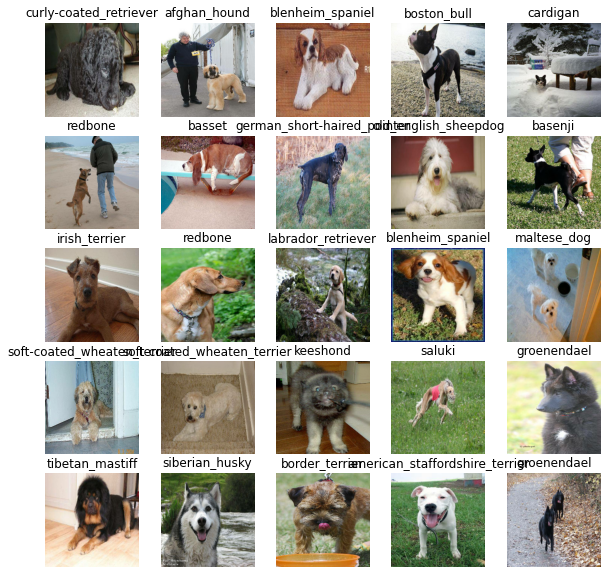

In [25]:
# Visualize training images from the training data batch
train_images,train_labels = next(train_data.as_numpy_iterator())
show_25_images(train_images,train_labels)

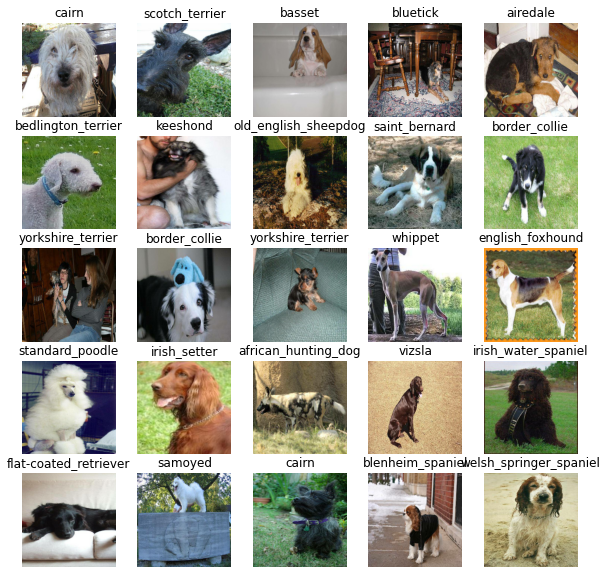

In [26]:
# Visualize validation images from the validation data batch
val_images, val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Creating and training a model

* We'll use an existing model from TensorFlow Hub.
* Using a pretrained machine learning model is often referred to as `transfer learning`.
*  mobilenet_v2_130_224 model,this model takes an input of images in the shape 224, 224 .The model has been trained in the domain of image classification.

## Building a model

Before we build a model, there are a few things we need to define:

* The input shape (images, in the form of Tensors) to our model.
* The output shape (image labels, in the form of Tensors) of our model.
* The URL of the model we want to use.

In [27]:
# Setup input shape to the model
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3] #batch,height,width,channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5"

Let's create a function which:

* Takes the input shape, output shape and the model we've chosen's URL as parameters.
* Defines the layers in a Keras model in a sequential fashion (do this first, then this, then that).
* Compiles the model (says how it should be evaluated and improved).
* Builds the model (tells it what kind of input shape it'll be getting).
* Returns the model.

In [28]:
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
    print("Building a model with:",MODEL_URL)
    
    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL), #Layer1 (input layer)
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") # Layer 2 (output layer)
    ])
    
    # Compile the model
    model.compile(
        loss = tf.keras.losses.CategoricalCrossentropy(),
        optimizer = tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )
    
    # Build the model
    model.build(INPUT_SHAPE)
    
    return model

What's happening here?
### Setting up the model layers

The first layer we use is the model from TensorFlow Hub `hub.KerasLayer(MODEL_URL)`. So our first layer is actually an entire model (many more layers). This **input layer** takes in our images and finds patterns in them based on the patterns `mobilenet_v2_130_224` has found.

The next layer (`tf.keras.layers.Dense()`) is the **output layer** of our model. It brings all of the information discovered in the input layer together and outputs it in the shape we're after, 120 (the number of unique labels we have).

The `activation="softmax"` parameter tells the output layer, we'd like to assign a probability value to each of the 120 labels somewhere between 0 & 1. The higher the value, the more the model believes the input image should have that label. If we were working on a binary classification problem, we'd use `activation="sigmoid"`.

### Compiling the model

* **loss** - Getting to 0 means the model is learning perfectly.
* **optimizer** -Adam is the optimizer,the one telling you how to lower the loss function.Other optimizers include RMSprop and Stochastic Gradient Descent.
* **metrics** - Giving the accuracy of how well our model is predicting the correct image label.

### Building the model

We use `model.build()` whenever we're using a layer from TensorFlow Hub to tell our model what input shape it can expect.

In this case, the input shape is **[None, IMG_SIZE, IMG_SIZE, 3] or [None, 224, 224, 3] or [batch_size, img_height, img_width, color_channels]**.

Batch size is left as `None` as this is inferred from the data we pass the model. In our case, it'll be 32.

We can call `summary()` on our model to get idea of what our model looks like.

The non-trainable parameters are the patterns learned by `mobilenet_v2_130_224` and the trainable parameters are the ones in the dense layer.

In [29]:
# Create a model and check its details
model = create_model()
model.summary()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating callbacks

Callbacks are helper functions a model can use during training to do things such as save a models progress, check a models progress or stop training early if a model stops improving.

### Early Stopping Callback

Early stopping helps prevent overfitting by stopping a model when a certain evaluation metric stops improving. If a model trains for too long, it can do so well at finding patterns in a certain dataset that it's not able to use those patterns on another dataset it hasn't seen before (doesn't generalize).

In [30]:
# Create early stopping (once our model stops improving, stop training)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3) # stops after 3 rounds of no improvements

## Training a model(subset of 1000 images)

In [31]:
# How many rounds should we get the model to look through the data?
NUM_EPOCHS = 100

In [32]:
# Build a function to train and return a trained model
def train_model():
    """
  Trains a given model and returns the trained version.
  """
    # create a model
    model = create_model()
    
    # Fit the model to the data passing it the callbacks we created
    
    model.fit(x=train_data,
             epochs=NUM_EPOCHS,
             validation_data=val_data,
             validation_freq=1, # check validation metrics every epoch
             callbacks = [early_stopping])
    
    return model

In [33]:
# Fit the model to the data
model = train_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100


2022-03-13 16:07:13.615170: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


25/25 [==============================] - 15s 237ms/step - loss: 4.5246 - accuracy: 0.1025 - val_loss: 3.4334 - val_accuracy: 0.2300
Epoch 2/100
25/25 [==============================] - 2s 88ms/step - loss: 1.6127 - accuracy: 0.6925 - val_loss: 2.1895 - val_accuracy: 0.4850
Epoch 3/100
25/25 [==============================] - 2s 88ms/step - loss: 0.5583 - accuracy: 0.9300 - val_loss: 1.7096 - val_accuracy: 0.5550
Epoch 4/100
25/25 [==============================] - 3s 102ms/step - loss: 0.2497 - accuracy: 0.9900 - val_loss: 1.5342 - val_accuracy: 0.6100
Epoch 5/100
25/25 [==============================] - 2s 86ms/step - loss: 0.1471 - accuracy: 0.9950 - val_loss: 1.4385 - val_accuracy: 0.6250
Epoch 6/100
25/25 [==============================] - 2s 87ms/step - loss: 0.1003 - accuracy: 1.0000 - val_loss: 1.4009 - val_accuracy: 0.6450
Epoch 7/100
25/25 [==============================] - 2s 85ms/step - loss: 0.0759 - accuracy: 1.0000 - val_loss: 1.3690 - val_accuracy: 0.6450
Epoch 8/100
25/

## Making and evaluating predictions using a trained model

In [34]:
# Make predictions on the validation data

predictions = model.predict(val_data,verbose=1) # verbose shows us how long there is to go
predictions

7/7 [==============================] - 1s 63ms/step


array([[7.48883118e-04, 4.87292127e-05, 9.46336659e-04, ...,
        2.50054902e-04, 2.36976157e-05, 1.40609285e-02],
       [1.56882976e-03, 3.45144334e-04, 1.58478264e-02, ...,
        1.24202261e-03, 2.17216229e-03, 8.63967507e-05],
       [5.14723297e-06, 2.14542612e-04, 6.05258429e-05, ...,
        8.00471753e-05, 1.11621976e-05, 1.20972178e-03],
       ...,
       [4.95350214e-05, 5.87981020e-04, 4.05617873e-04, ...,
        5.81833374e-05, 5.26402728e-04, 3.88787594e-04],
       [5.53535391e-03, 2.91578181e-04, 6.24131877e-04, ...,
        2.67900148e-04, 6.06528956e-05, 7.20765721e-03],
       [5.39960922e-04, 2.51024932e-04, 1.03161565e-03, ...,
        6.48594229e-03, 1.47864316e-03, 8.75973783e-05]], dtype=float32)

In [35]:
# Check the shape of predictions
predictions.shape

(200, 120)

In this case, making predictions on the validation data (200 images) returns an array (predictions) of arrays, each containing 120 different values (one for each unique dog breed).

These different values are the probabilities or the likelihood the model has predicted a certain image being a certain breed of dog. 

In [36]:
# First prediction
print(predictions[0])
print(f",max value (probability of predictions): {np.max(predictions[0])}") # the max probability value predicted by the model
print(f"Sum:{np.sum(predictions[0])}") #because we used softmax activation in our model, this will be close to 1
print(f"Max Index: {np.argmax(predictions[0])}") # the index of where the max value in predictions[0] occurs
print(f"Predicted label : {unique_breeds[np.argmax(predictions[0])]}")

[7.48883118e-04 4.87292127e-05 9.46336659e-04 8.60987202e-05
 4.76134592e-04 1.80203060e-05 5.82018960e-03 1.80981253e-04
 1.19482560e-04 6.46141765e-04 3.65436194e-04 2.40075478e-05
 2.63554830e-04 1.65697274e-04 5.27237076e-04 8.30298013e-05
 1.77156500e-04 3.27196211e-01 8.95038738e-06 1.70081112e-05
 3.27276415e-03 3.69625224e-04 2.28218541e-05 4.48003615e-04
 5.14809017e-06 1.00047000e-04 1.22359298e-01 4.25774306e-05
 2.09657731e-03 1.36781935e-04 7.71245323e-05 2.32724077e-03
 3.26185953e-04 8.94453842e-05 6.62004095e-05 1.96220800e-02
 7.02059151e-06 4.61204763e-04 1.24898797e-04 1.91427316e-04
 3.33349017e-04 1.19516677e-04 6.61057202e-05 3.70014750e-05
 5.05030148e-05 1.50373948e-04 2.75119037e-05 1.56405469e-04
 2.55867635e-04 5.26807562e-05 5.60399320e-04 3.29259274e-05
 9.21908300e-04 2.57212632e-05 4.04715502e-05 2.01609510e-05
 1.25785518e-04 4.02411772e-03 2.17075646e-03 1.69078112e-01
 2.41552058e-04 1.85125718e-05 7.46328908e-04 7.05286993e-06
 3.57235345e-04 7.642243

In [37]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
  Turns an array of prediction probabilities into a label.
  """
    return unique_breeds[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities

pred_label = get_pred_label(predictions[0])
pred_label

'border_terrier'

Since our validation data (`val_data`) is in batch form, to get a list of validation images and labels, we'll have to unbatch it (`using unbatch()`) and then turn it into an iterator using `as_numpy_iterator()`

In [38]:
# Create a function to unbatch a batched dataset
def unbatchify(data):
    """
  Takes a batched dataset of (image, label) Tensors and returns separate arrays
  of images and labels.
  """
    images = []
    labels = []
    
    # Loop through unbatched data
    
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images,labels                  
                      
# Unbatchify the validation data
    
val_images,val_labels = unbatchify(val_data)
val_images[0],val_labels[0]                      

(array([[[0.29599646, 0.43284872, 0.3056691 ],
         [0.26635826, 0.32996926, 0.22846507],
         [0.31428418, 0.27701408, 0.22934894],
         ...,
         [0.77614343, 0.82320225, 0.8101595 ],
         [0.81291157, 0.8285351 , 0.8406944 ],
         [0.8209297 , 0.8263737 , 0.8423668 ]],
 
        [[0.2344871 , 0.31603682, 0.19543913],
         [0.3414841 , 0.36560842, 0.27241898],
         [0.45016077, 0.40117094, 0.33964607],
         ...,
         [0.7663987 , 0.8134138 , 0.81350833],
         [0.7304248 , 0.75012016, 0.76590735],
         [0.74518913, 0.76002574, 0.7830809 ]],
 
        [[0.30157745, 0.3082587 , 0.21018331],
         [0.2905954 , 0.27066195, 0.18401104],
         [0.4138316 , 0.36170745, 0.2964005 ],
         ...,
         [0.79871625, 0.8418535 , 0.8606443 ],
         [0.7957738 , 0.82859945, 0.8605655 ],
         [0.75181633, 0.77904975, 0.8155256 ]],
 
        ...,
 
        [[0.9746779 , 0.9878955 , 0.9342279 ],
         [0.99153054, 0.99772066, 0.94278

The first function will:

* Take an array of prediction probabilities, an array of truth labels, an array of images and an integer.
* Convert the prediction probabilities to a predicted label.
* Plot the predicted label, its predicted probability, the truth label and target image on a single plot.

In [39]:
def plot_pred(prediction_probabilities, labels, images, n=8):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

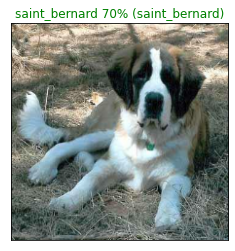

In [40]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images)

The function will:

* Take an input of a prediction probabilities array, a ground truth labels array and an integer.
* Find the predicted label using get_pred_label().
* Find the top 10:
  * Prediction probabilities indexes
  * Prediction probabilities values
  * Prediction labels
* Plot the top 10 prediction probability values and labels, coloring the true label green.

In [41]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
    """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
    pred_prob,true_label = prediction_probabilities[n],labels[n]
    
    # Get the predicted label
    pred_label = get_pred_label(pred_prob)
    
    # Find the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # Find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # Find the top 10 prediction labels
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # Setup plot
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                      top_10_pred_values,
                      color="grey")
    
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")
    
    # Change color of true label
    if np.isin(true_label,top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
    else:    
         pass
    

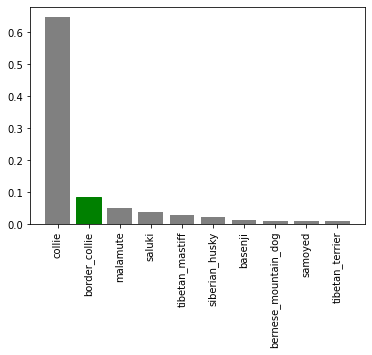

In [42]:
plot_pred_conf(prediction_probabilities = predictions,labels=val_labels,n=9)

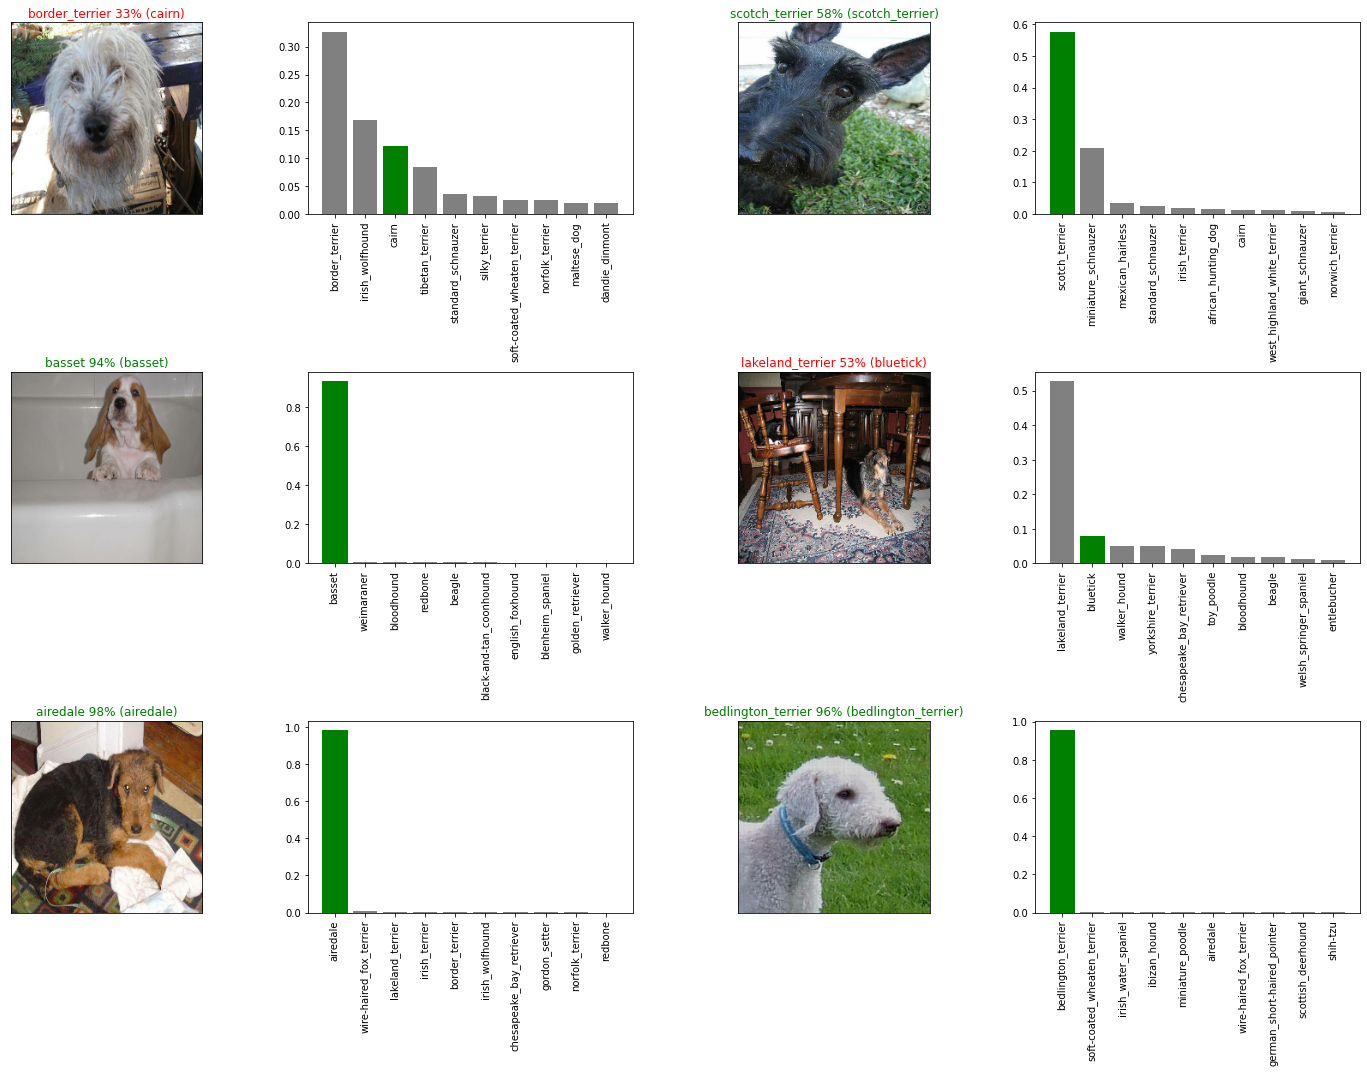

In [43]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols,5*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
    
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()    

## Saving and reloading a model

In [44]:
def save_model(model,suffix=None):
    print("Saving model...")
    model.save("model_"+suffix+".h5")

In [45]:
def load_model(model_path):
    print("Loading saved model......")
    model = tf.keras.models.load_model(model_path,
                                      custom_objects={"KerasLayer":hub.KerasLayer})
    return model

In [46]:
# Save our model trained on 1000 images
save_model(model,suffix="1000-images-Adam")

Saving model...


In [47]:
# Load our model trained on 1000 images
model_1000_images = load_model("./model_1000-images-Adam.h5")

Loading saved model......


In [48]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 70ms/step - loss: 1.3277 - accuracy: 0.6450


[1.327652931213379, 0.6449999809265137]

In [49]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 66ms/step - loss: 1.3277 - accuracy: 0.6450


[1.327652931213379, 0.6449999809265137]

## Training a model (on the full data)

In [50]:
len(X), len(Y)

(10222, 10222)

In [51]:
# Turn full training data in a data batch
full_data=create_data_batches(X,Y)

Creating train data batches


In [52]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building a model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [53]:
# Create full model callbacks
# Early stopping callback
# Note: No validation set when training on all the data, therefore can't monitor validation accruacy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [54]:
# Fit the full model to the full training data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 57s 170ms/step - loss: 1.3755 - accuracy: 0.6672
Epoch 2/100
320/320 [==============================] - 24s 74ms/step - loss: 0.3997 - accuracy: 0.8803
Epoch 3/100
320/320 [==============================] - 23s 73ms/step - loss: 0.2355 - accuracy: 0.9346
Epoch 4/100
320/320 [==============================] - 23s 71ms/step - loss: 0.1533 - accuracy: 0.9640
Epoch 5/100
320/320 [==============================] - 23s 71ms/step - loss: 0.1052 - accuracy: 0.9794
Epoch 6/100
320/320 [==============================] - 24s 73ms/step - loss: 0.0778 - accuracy: 0.9866
Epoch 7/100
320/320 [==============================] - 23s 71ms/step - loss: 0.0583 - accuracy: 0.9916
Epoch 8/100
320/320 [==============================] - 24s 74ms/step - loss: 0.0453 - accuracy: 0.9952
Epoch 9/100
320/320 [==============================] - 23s 73ms/step - loss: 0.0370 - accuracy: 0.9961
Epoch 10/100
320/320 [==============================] - 25s 77ms/step - 

## Saving and reloading the full model

In [55]:
# Save model to file
save_model(full_model,suffix="all-image-Adam")

Saving model...


In [56]:
# Load in the full model
loaded_full_model = load_model("./model_all-image-Adam.h5")

Loading saved model......


## Making predictions on the test dataset

To make predictions on the test data, we'll:

* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to True (since there are no labels with the test images).
* Make a predictions array by passing the test data batches to the `predict()` function.

In [57]:
test_filenames = ["../input/dog-breed-identification/test/"+fname for fname in os.listdir("../input/dog-breed-identification/test")]
test_filenames[:10]

['../input/dog-breed-identification/test/09e51e17e2b756ff2ace8a87bd1443fa.jpg',
 '../input/dog-breed-identification/test/f7a32505c12649183c5991ecfa7d68b3.jpg',
 '../input/dog-breed-identification/test/bc6d50ffb4644feb34530aa58943e85b.jpg',
 '../input/dog-breed-identification/test/7cbc041e79135a572aad87904b5c9c57.jpg',
 '../input/dog-breed-identification/test/f3b603f10d6a344f0395fb46b242ff8e.jpg',
 '../input/dog-breed-identification/test/db55098d859d27a3c05b0e3fc41d43e7.jpg',
 '../input/dog-breed-identification/test/665bab06a3ea861c0812c778486988e3.jpg',
 '../input/dog-breed-identification/test/7b57911ea7559cebd6db308125926642.jpg',
 '../input/dog-breed-identification/test/df0d6ba158287cb2b3ed6459a22d42ba.jpg',
 '../input/dog-breed-identification/test/b80d89ad4a17ac2537ff46d251efcd7c.jpg']

In [58]:
# How many test images are there?
len(test_filenames)

10357

In [59]:
# Create test data batch
test_data = create_data_batches(test_filenames, test_data=True)

Creating test data batches.....


In [60]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 60s 184ms/step


In [61]:
# Check out the test predictions
test_predictions[:1]

array([[2.67308571e-11, 4.57326268e-14, 2.91920571e-10, 6.40123343e-10,
        5.48424153e-03, 4.69533646e-13, 3.89050747e-09, 2.28583481e-08,
        1.25940436e-12, 1.91596383e-09, 6.35179368e-14, 4.28405378e-15,
        3.24741067e-10, 4.70937568e-12, 1.18790269e-10, 1.84040977e-11,
        2.94766739e-10, 9.12880296e-07, 2.66324560e-13, 1.81267649e-06,
        1.17740284e-09, 1.28606380e-05, 2.26972316e-10, 8.92066089e-16,
        1.69548891e-13, 4.95305352e-09, 2.53254946e-08, 4.50220039e-09,
        3.78249848e-10, 4.05320166e-10, 1.00405510e-10, 2.17782454e-12,
        1.69533554e-11, 5.01223646e-11, 7.01527638e-12, 4.78896003e-12,
        1.43433121e-09, 4.48225368e-09, 2.16461397e-12, 1.26675233e-12,
        8.72269618e-12, 7.72278561e-11, 6.12808915e-10, 2.59657074e-12,
        1.36582263e-15, 5.96753671e-05, 7.33250183e-10, 2.96376964e-13,
        8.28169320e-14, 1.62896836e-14, 4.30010946e-14, 1.01848752e-08,
        1.24888354e-13, 1.72924081e-06, 2.50454713e-13, 7.113976

## Making predictions on custom images

If we want to make predictions on our own custom images, we have to pass them to the model in the same format the model was trained on.

To do so, we'll:

Get the filepaths of our own images.
Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
Pass the custom image data batch to our model's `predict()` method.
Convert the prediction output probabilities to prediction labels.
Compare the predicted labels to the custom images.

In [62]:
# Get custom image filepaths
custom_filenames = ["../input/dogimages2/"+fname for fname in os.listdir("../input/dogimages2")]
custom_filenames[:3]

['../input/dogimages2/hovawart-black.jpg',
 '../input/dogimages2/chinook.jpg',
 '../input/dogimages2/bernese-mountain.jpg']

In [63]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_data_batches(custom_filenames, test_data=True)

Creating test data batches.....


In [64]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)

In [65]:
# Get custom image prediction labels
custom_preds_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))] 

In [66]:
# Get custom images
custom_images=[]
# Loop through unbatched data
for images in custom_data.unbatch().as_numpy_iterator():
    custom_images.append(images)

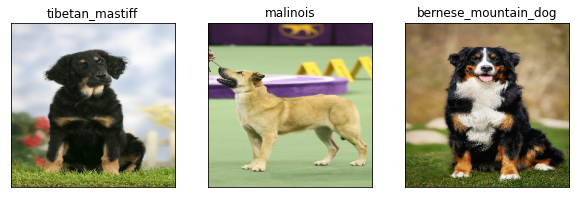

In [67]:
# Check custom image predictions
plt.figure(figsize=(10,10))
for i,image in enumerate(custom_images):
    plt.subplot(1,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_preds_labels[i])
    plt.imshow(image)